# Introduction

Dans ce notebook, on affiche la distribution des variables de sorte à montrer que nous sommes en présence d'un jeu de données biaisé et très déséquilibré à tous niveaux : 
- temporel : beaucoup plus d'observations en milieu de journée et en saison haute, 
- météorologique : plus d'observations lors de conditions de vent, nébulosité et température favorables (temps doux),
- insectes : sur-représentation d'insectes : le bourdon et l'abeille méllifère représentent à eux deux 10% du dataset sur les plus de 500 insectes répertoriés (taxon : insecte_sc)
- idem pour les plantes avec une sur-représentation des plantes les plus communément rencontrées : 30% des observations reposent sur des plantes de la famille des Astéracées.

Tout l'enjeu sera donc d'extraire de l'information, via des méthodes supervisées et/ou non supervisées, malgré le déséquilibre du jeu de données.

# Chargement des données

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./spipoll.csv")

C:\Users\guilts0300\AppData\Local\Temp\ipykernel_712\35506862.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./spipoll.csv")


In [3]:
df.head(5)

,collection_id,collection_nom,protocole_long,user_id,plante_famille,plante_genre,plante_espece,plante_sc,plante_fr,plante_precision,...,insecte_espece,insecte_sc,insecte_fr,insecte_denominationPlusPrecise,insecte_CdNomtaxref,insecte_abondance,insecte_commentaire,insecte_vu_sur_fleur,nb_validation,nb_suggestion
0,1,sentier ZH,NaN,12 657,Fabaceae,Trifolium,Trifolium pratense,Les Trèfles à fleurs blanches ou roses en boul...,NaN,NaN,...,Apis mellifera,Apis mellifera,L'Abeille mellifère,NaN,NaN,plus de 5,NaN,0.0,3.0,NaN
1,1,sentier ZH,NaN,12 657,Fabaceae,Trifolium,Trifolium pratense,Les Trèfles à fleurs blanches ou roses en boul...,NaN,NaN,...,NaN,Bombus,Les Bourdons noirs à bande(s) jaune(s) et cul ...,NaN,NaN,1,NaN,0.0,3.0,NaN
2,2,Ma belle collection au jardin des plantes !,NaN,10 918,Acanthaceae,Acanthus,Acanthus spinosus,Acanthus mollis,Acanthe molle,NaN,...,NaN,Bombus,Les Bourdons noirs à bande(s) jaune(s) et cul ...,NaN,NaN,je n'ai pas l'information,NaN,0.0,3.0,NaN
3,2,Ma belle collection au jardin des plantes !,NaN,10 918,Acanthaceae,Acanthus,Acanthus spinosus,Acanthus mollis,Acanthe molle,NaN,...,NaN,Sarcophaga,Les Mouches à damier,NaN,NaN,entre 2 et 5,NaN,0.0,3.0,1.0
4,2,Ma belle collection au jardin des plantes !,NaN,10 918,Acanthaceae,Acanthus,Acanthus spinosus,Acanthus mollis,Acanthe molle,NaN,...,Apis mellifera,Apis mellifera,L'Abeille mellifère,NaN,NaN,entre 2 et 5,NaN,0.0,3.0,NaN


In [4]:
df.columns

Index(['collection_id', 'collection_nom', 'protocole_long', 'user_id',
       'plante_famille', 'plante_genre', 'plante_espece', 'plante_sc',
       'plante_fr', 'plante_precision', 'plante_inconnue', 'plante_caractere',
       'photo_fleur', 'photo_plante', 'photo_feuille', 'coordonnees_GPS',
       'code_postal', 'habitat', 'grande_culture', 'collection_date',
       'collection_heure_debut', 'nebulosite', 'temperature', 'vent',
       'fleur_ombre', 'insecte_ordre', 'insecte_super_famille',
       'insecte_famille', 'insecte_sous_famille', 'insecte_genre',
       'insecte_espece', 'insecte_sc', 'insecte_fr',
       'insecte_denominationPlusPrecise', 'insecte_CdNomtaxref',
       'insecte_abondance', 'insecte_commentaire', 'insecte_vu_sur_fleur',
       'nb_validation', 'nb_suggestion'],
      dtype='object')

In [5]:
unused_columns = ['collection_nom', 'protocole_long', 'user_id',
       'photo_fleur', 'photo_plante', 'photo_feuille',               
       'plante_caractere', 'plante_inconnue',
       'photo_fleur', 'photo_plante', 'photo_feuille', 'coordonnees_GPS',
       'code_postal', 'fleur_ombre', 
       'insecte_abondance', 'insecte_commentaire', 'insecte_vu_sur_fleur',
       'nb_validation', 'nb_suggestion']

In [6]:
df.drop(columns=unused_columns, inplace=True)

In [7]:
df.columns

Index(['collection_id', 'plante_famille', 'plante_genre', 'plante_espece',
       'plante_sc', 'plante_fr', 'plante_precision', 'habitat',
       'grande_culture', 'collection_date', 'collection_heure_debut',
       'nebulosite', 'temperature', 'vent', 'insecte_ordre',
       'insecte_super_famille', 'insecte_famille', 'insecte_sous_famille',
       'insecte_genre', 'insecte_espece', 'insecte_sc', 'insecte_fr',
       'insecte_denominationPlusPrecise', 'insecte_CdNomtaxref'],
      dtype='object')

# Distributions

## Dates de collection

### Heures

In [8]:
df['collection_heure_debut'].value_counts()

2014-05-30 10:00:00    143
2013-10-28 12:00:00    131
2013-08-05 08:15:00    124
2015-07-18 12:25:00    118
2018-05-26 13:20:00    114
                      ... 
2016-06-04 08:33:00      1
2022-05-04 18:10:00      1
2017-03-02 14:13:00      1
2017-02-25 14:00:00      1
2015-06-03 14:55:00      1
Name: collection_heure_debut, Length: 69453, dtype: int64

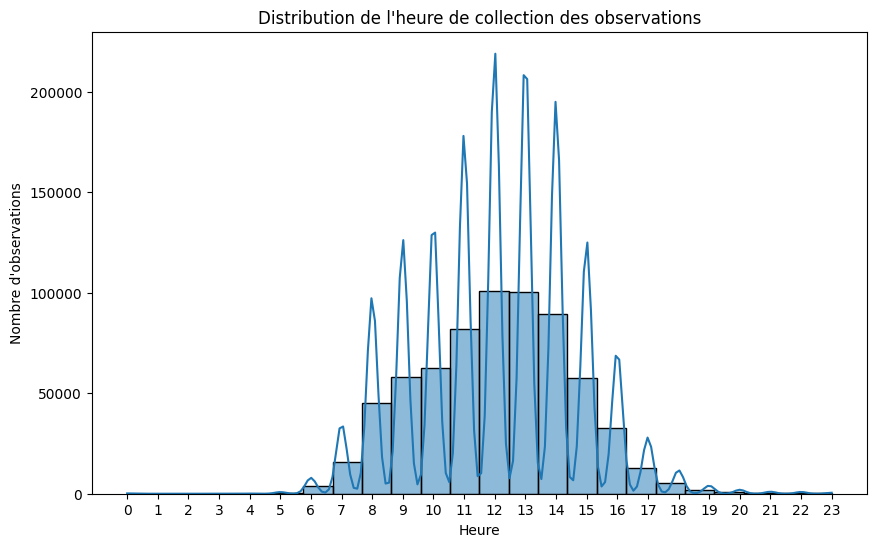

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conversion en format datetime 
df['collection_heure_debut'] = pd.to_datetime(df['collection_heure_debut'])

# Création d'une nouvelle colonne pour extraire l'heure de la colonne datetime
df['heure_collection'] = df['collection_heure_debut'].dt.hour

# Affichage de la distribution de l'heure
plt.figure(figsize=(10, 6))
sns.histplot(df['heure_collection'], bins=24, kde=True) 
plt.title('Distribution de l\'heure de collection des observations')
plt.xlabel('Heure')
plt.ylabel('Nombre d\'observations')
plt.xticks(range(0, 24))  # Marqueurs de l'axe x pour chaque heure
plt.grid(False)
plt.show()


### Mois

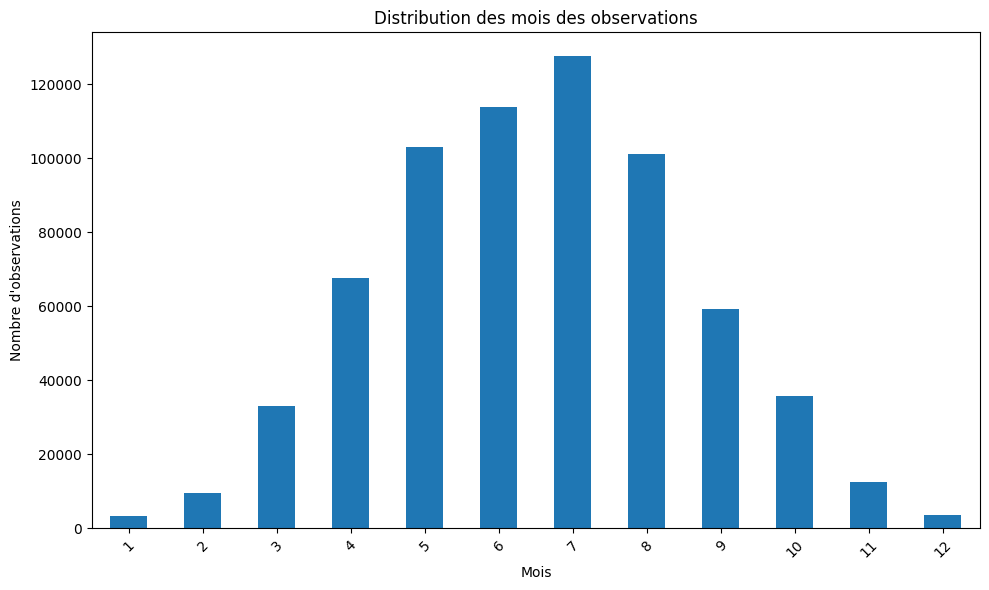

In [11]:
# Conversion
df['collection_heure_debut'] = pd.to_datetime(df['collection_heure_debut'])

# Extrait uniquement le mois de la colonne datetime
df['mois_collection'] = df['collection_heure_debut'].dt.month

# Compter les occurrences de chaque mois
month_counts = df['mois_collection'].value_counts().sort_index()

# Affichez la distribution des mois
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar')
plt.title('Distribution des mois des observations')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Années

C:\Users\guilts0300\AppData\Local\Temp\ipykernel_18808\2383970469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['collection_heure_debut'] = pd.to_datetime(df['collection_heure_debut'])


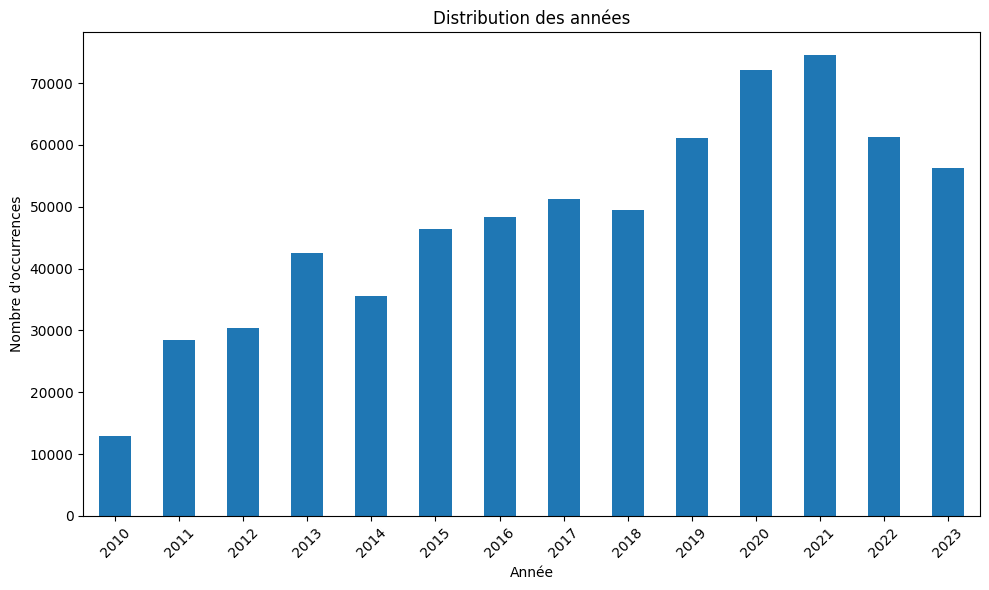

In [38]:
# Conversion dans le bon format
df['collection_heure_debut'] = pd.to_datetime(df['collection_heure_debut'])

# Filtrage pour inclure uniquement les données à partir de l'année 2010
df = df[df['collection_heure_debut'].dt.year >= 2010]

# Extraction uniquement de l'année
df['annee_collection'] = df['collection_heure_debut'].dt.year

# Comptage des occurrences de chaque année
year_counts = df['annee_collection'].value_counts().sort_index()

# Dictionnaire pour toutes les années à partir de 2010
all_years = pd.Series(0, index=range(2010, df['annee_collection'].max() + 1))

# MAJ du dictionnaire avec les valeurs comptées
all_years.update(year_counts)

# Distribution des années à partir de 2010
plt.figure(figsize=(10, 6))
all_years.plot(kind='bar')
plt.title('Distribution des années')
plt.xlabel('Année')
plt.ylabel('Nombre d\'observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Variables catégoriques

### Histogrammes

In [29]:
df.dtypes

collection_id                              object
plante_famille                             object
plante_genre                               object
plante_espece                              object
plante_sc                                  object
plante_fr                                  object
plante_precision                           object
plante_inconnue                           float64
habitat                                    object
grande_culture                             object
collection_date                            object
collection_heure_debut             datetime64[ns]
nebulosite                                 object
temperature                                object
vent                                       object
insecte_ordre                              object
insecte_super_famille                      object
insecte_famille                            object
insecte_sous_famille                       object
insecte_genre                              object


In [30]:
df.columns

Index(['collection_id', 'plante_famille', 'plante_genre', 'plante_espece',
       'plante_sc', 'plante_fr', 'plante_precision', 'plante_inconnue',
       'habitat', 'grande_culture', 'collection_date',
       'collection_heure_debut', 'nebulosite', 'temperature', 'vent',
       'insecte_ordre', 'insecte_super_famille', 'insecte_famille',
       'insecte_sous_famille', 'insecte_genre', 'insecte_espece', 'insecte_sc',
       'insecte_fr', 'insecte_denominationPlusPrecise', 'insecte_CdNomtaxref',
       'heure_collection'],
      dtype='object')

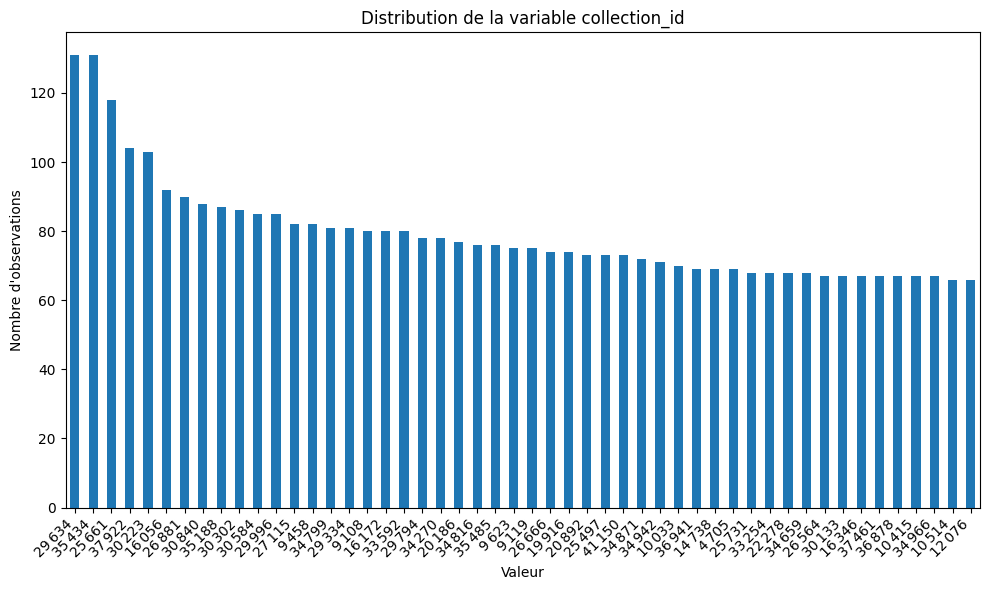

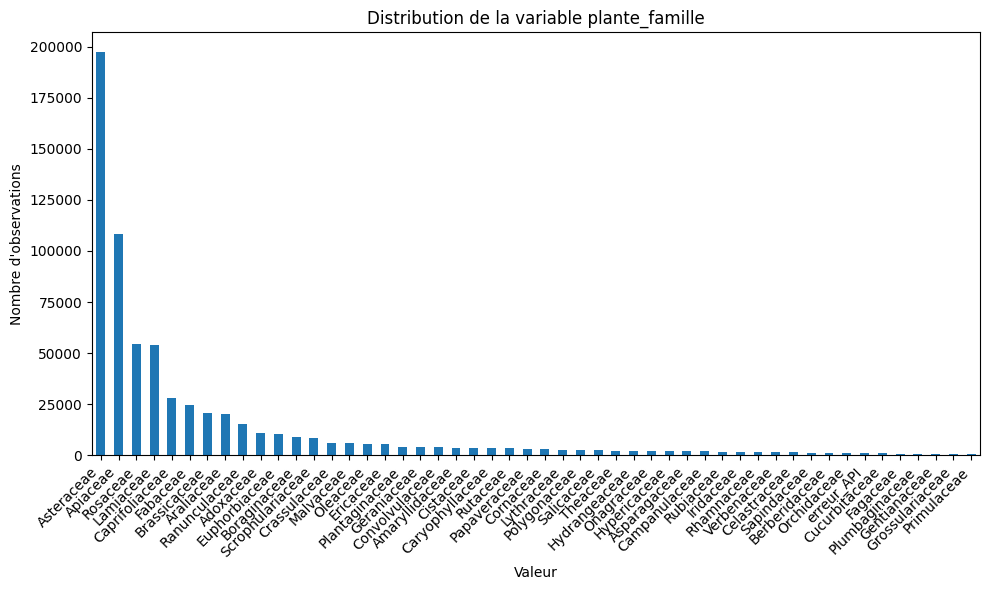

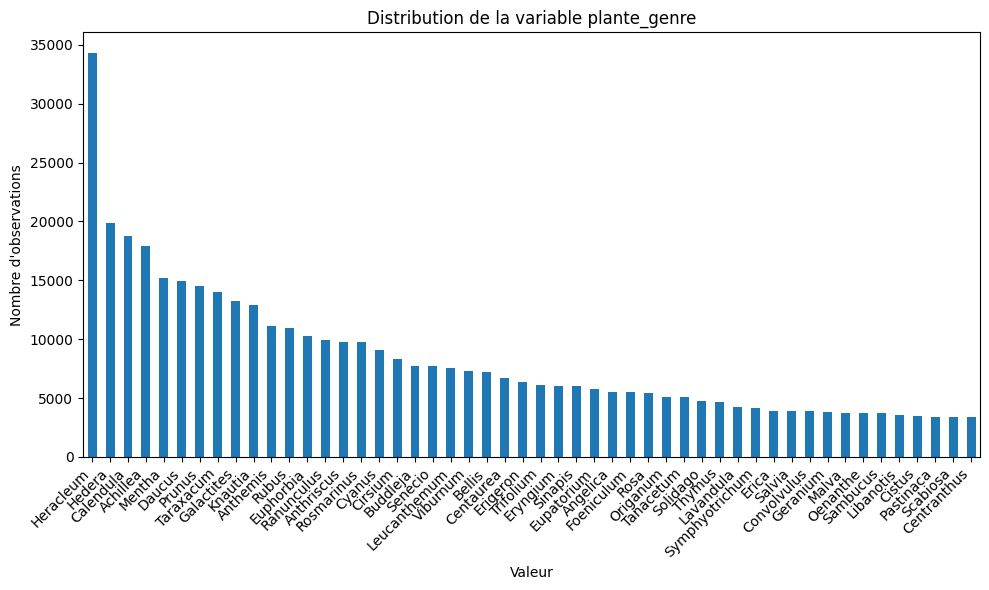

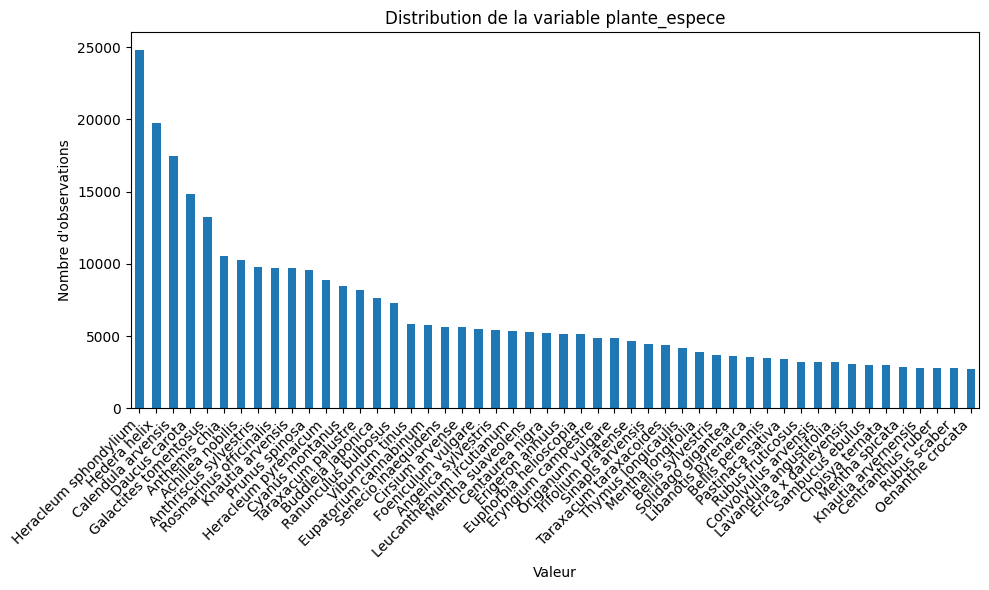

C:\Users\guilts0300\AppData\Local\Temp\ipykernel_712\1227774093.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


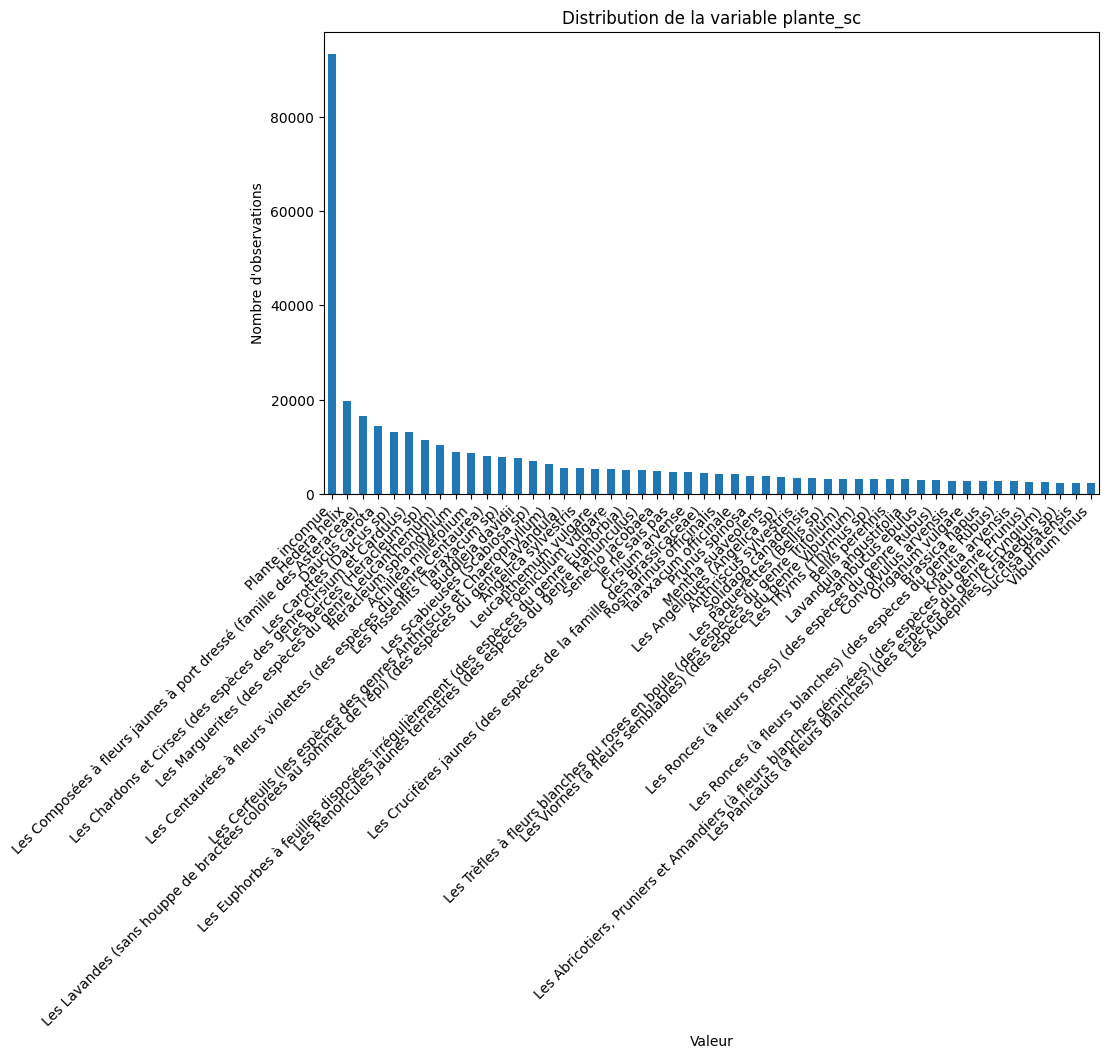

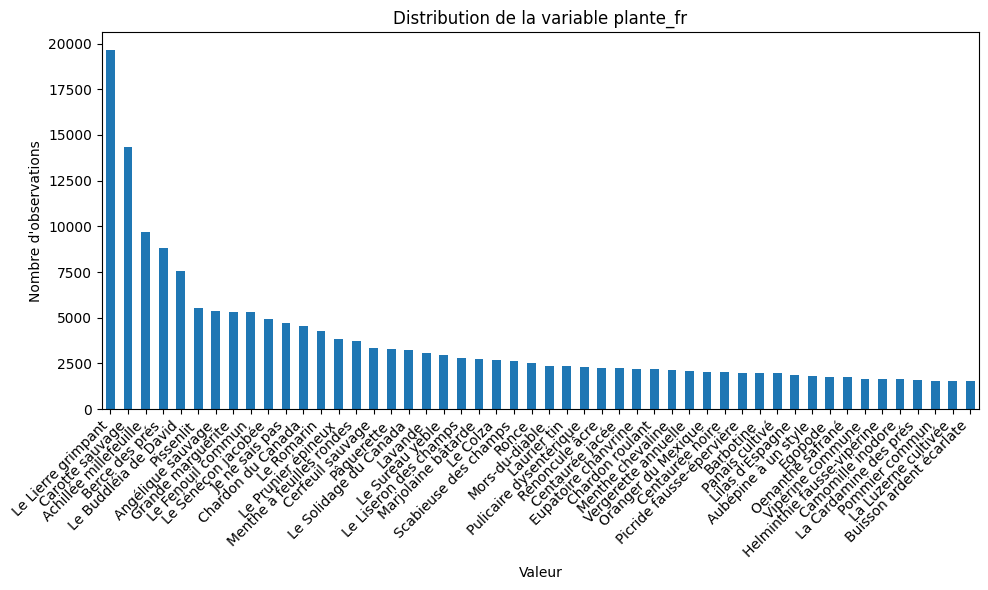

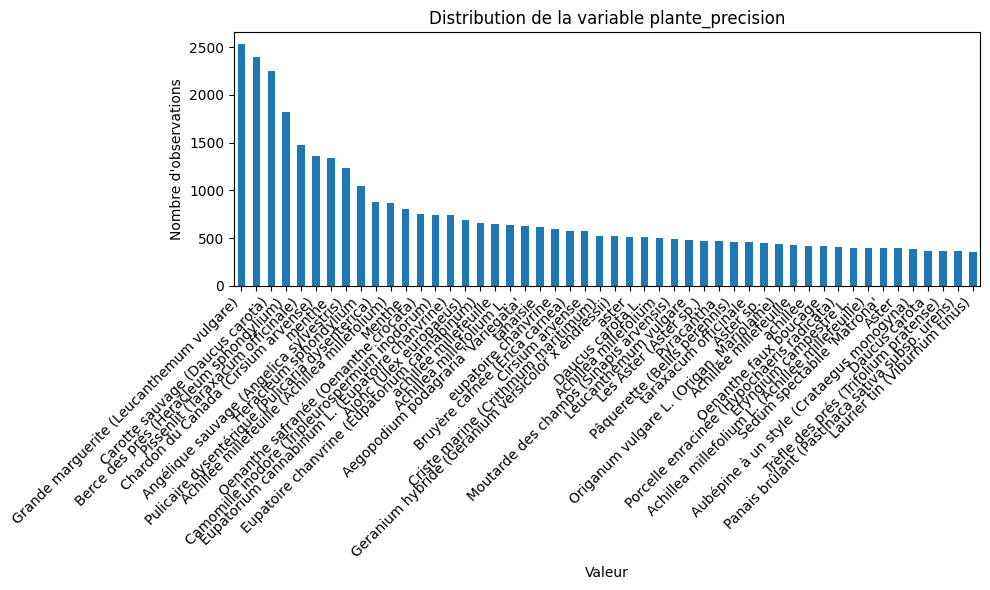

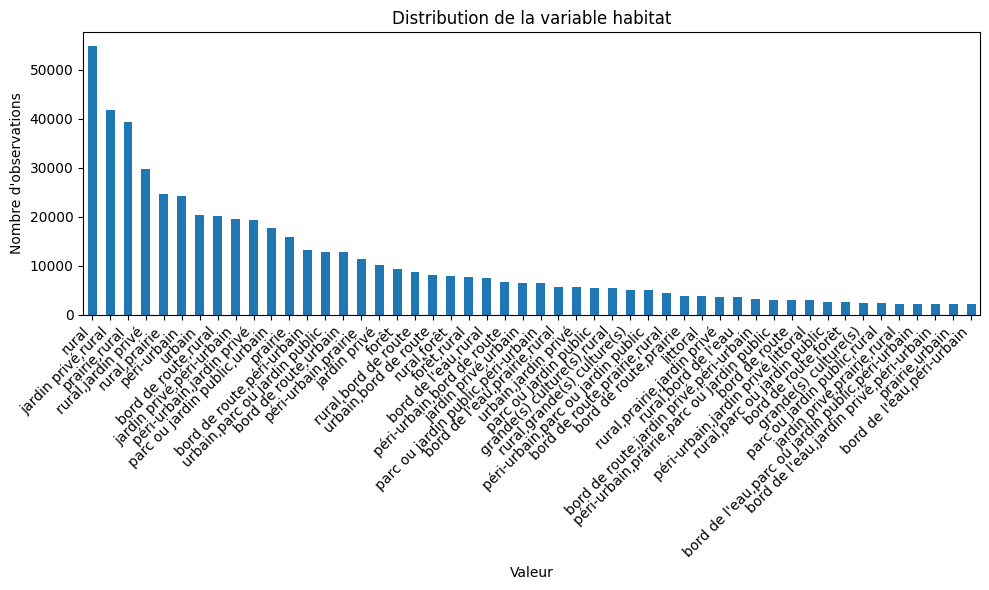

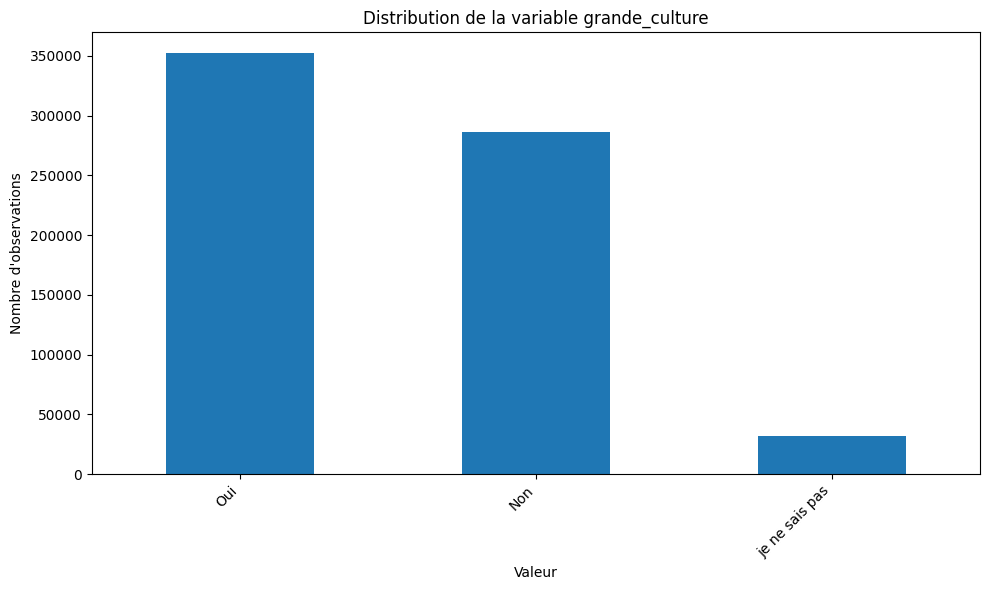

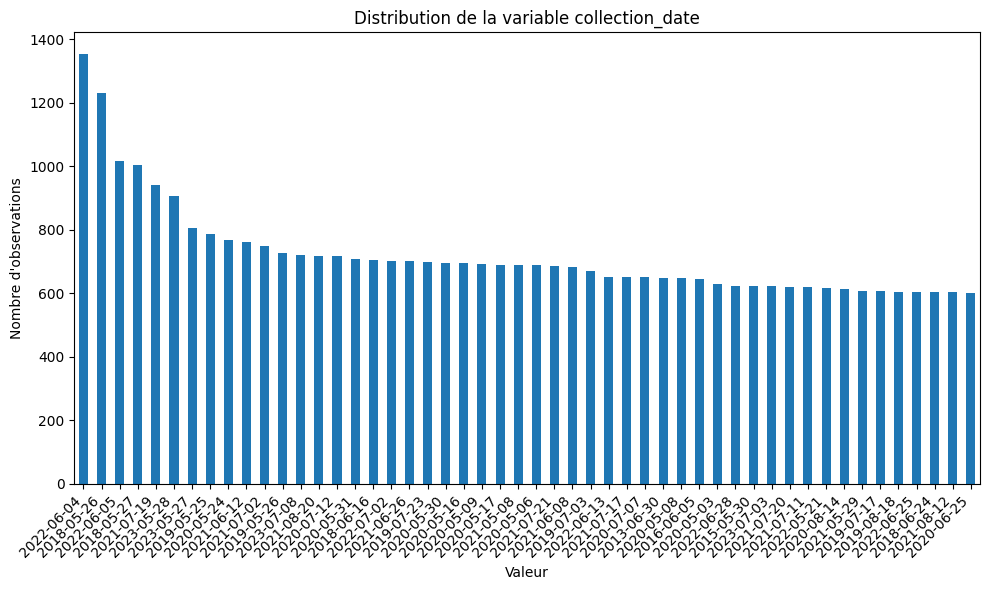

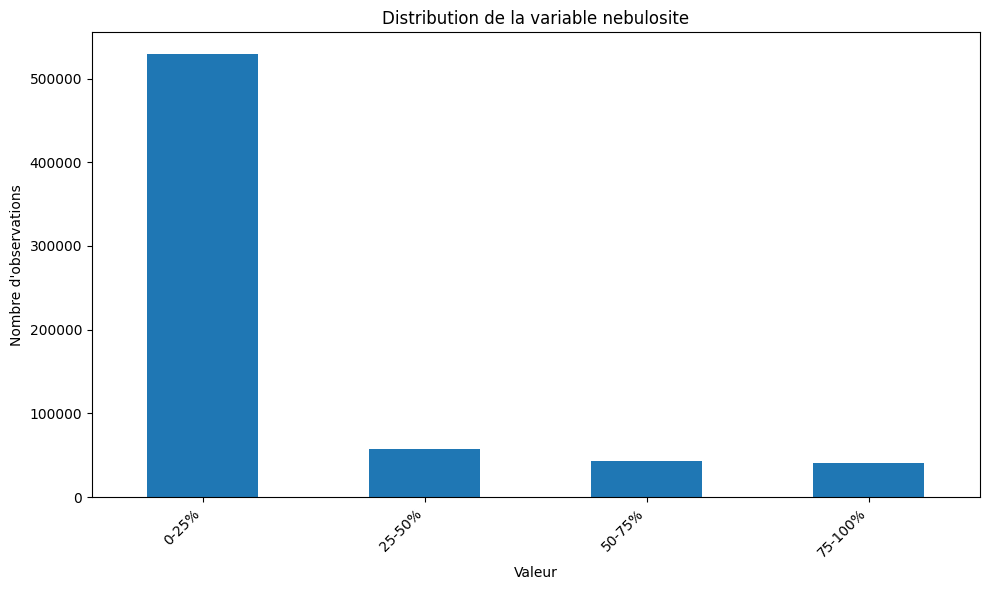

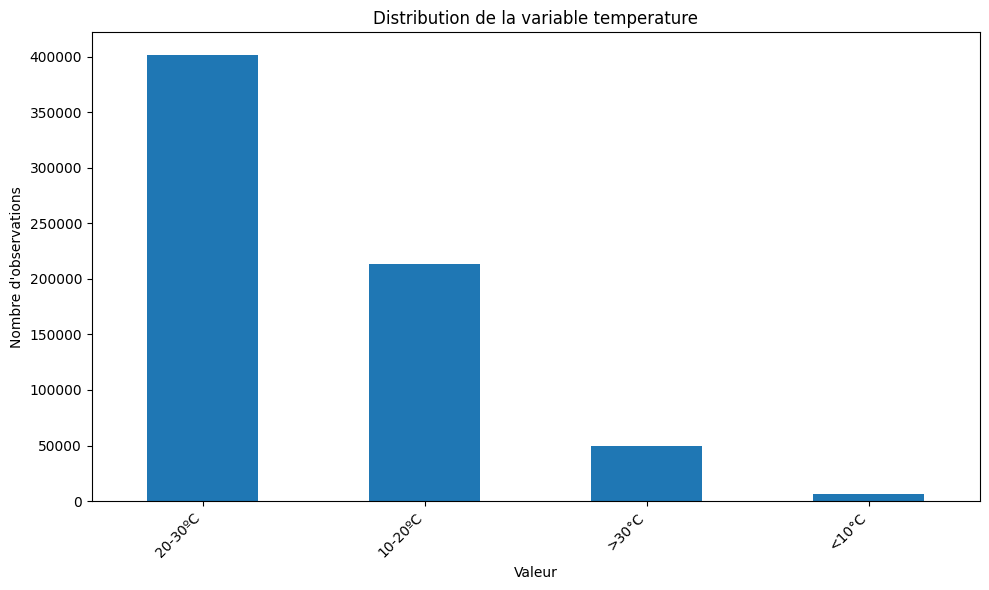

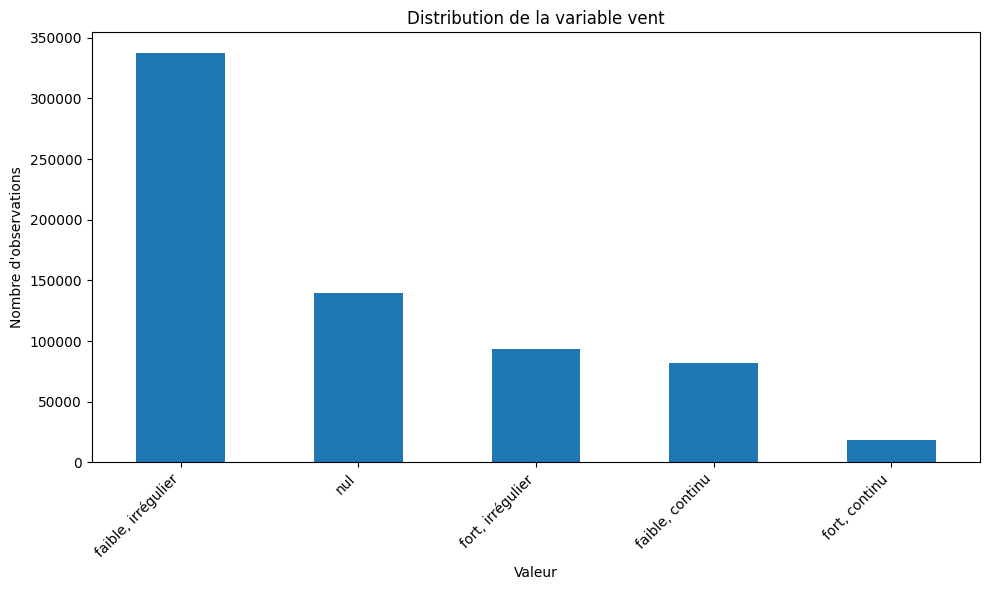

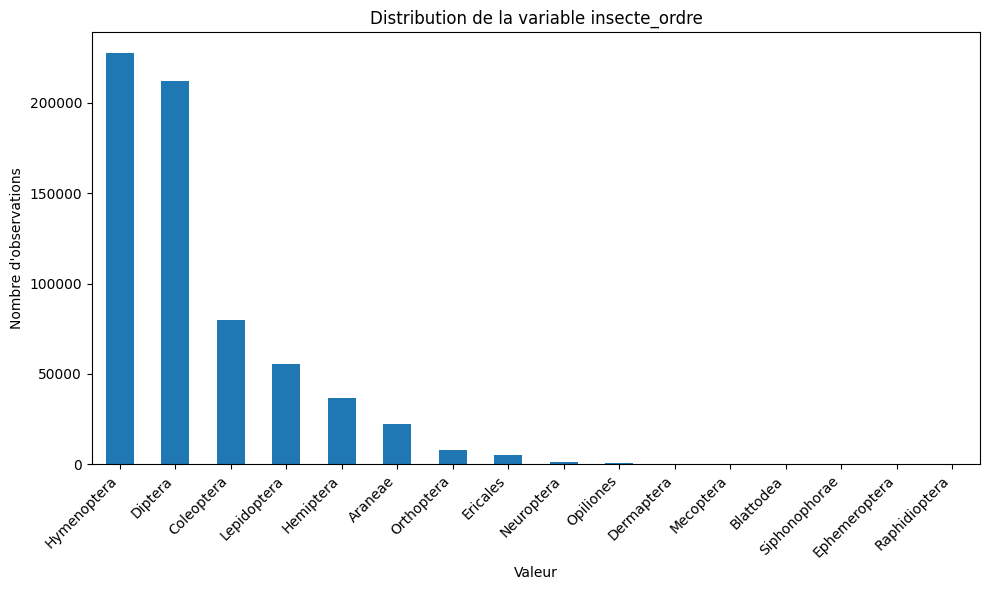

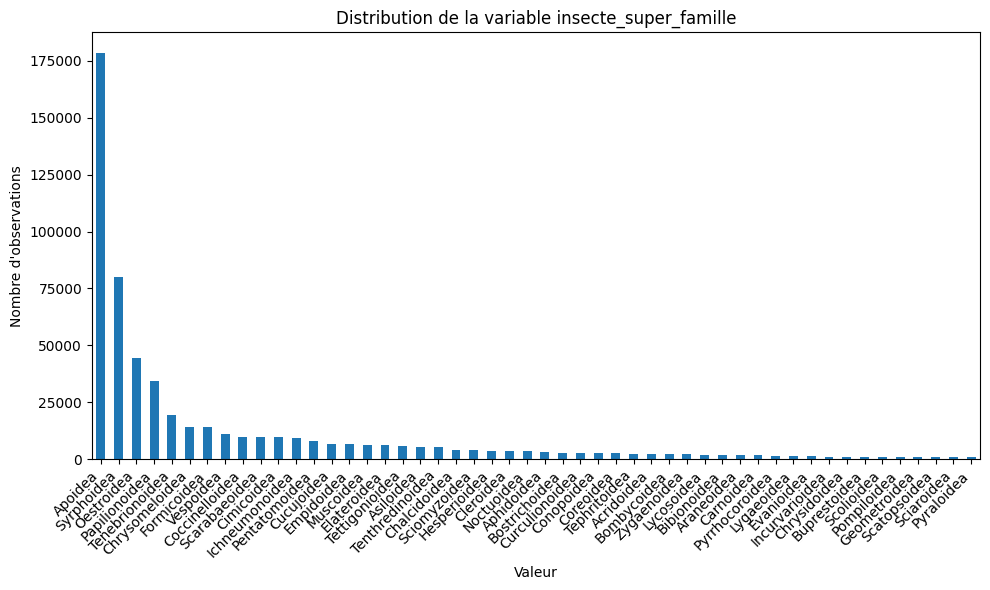

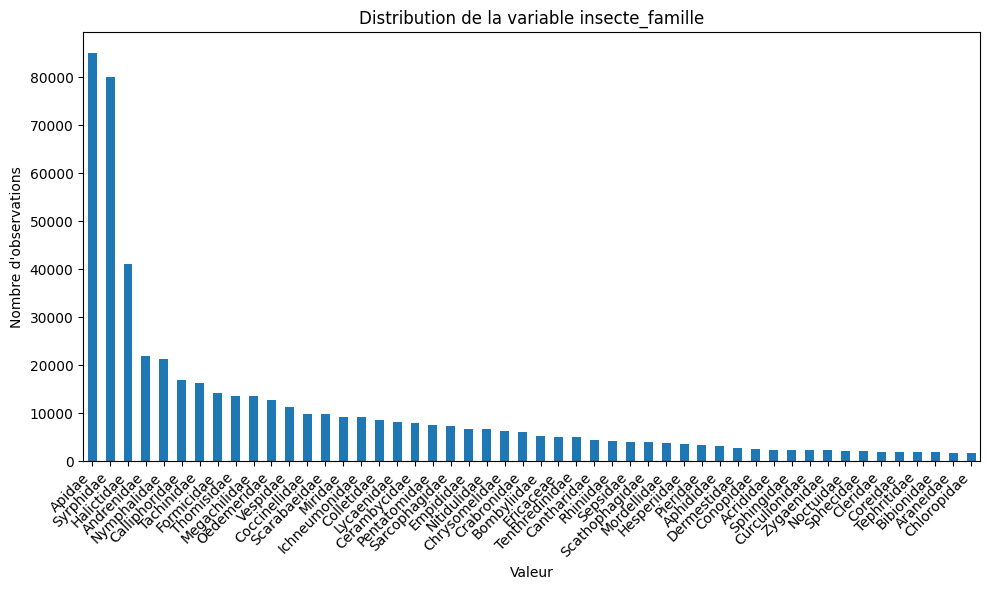

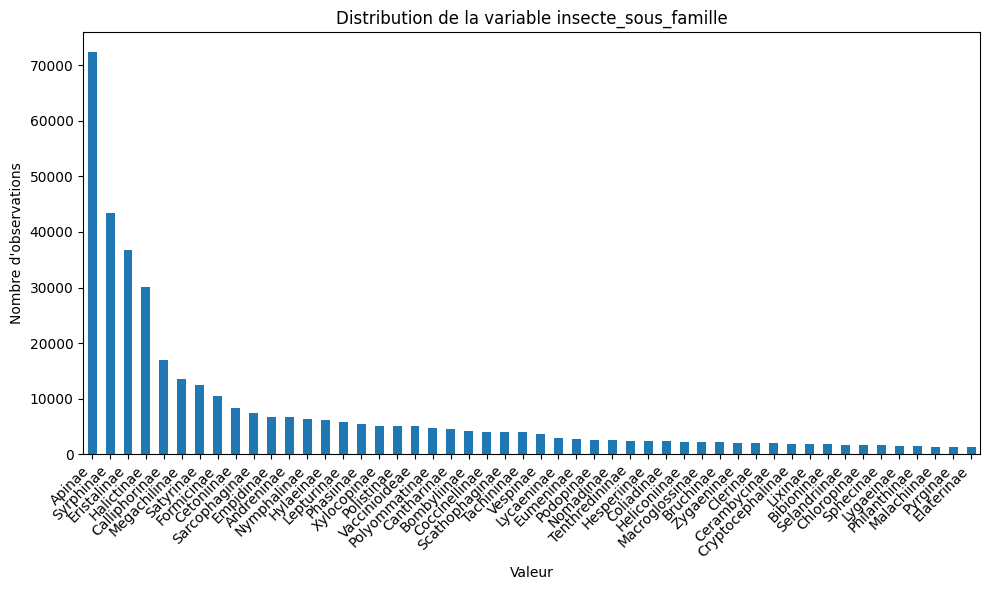

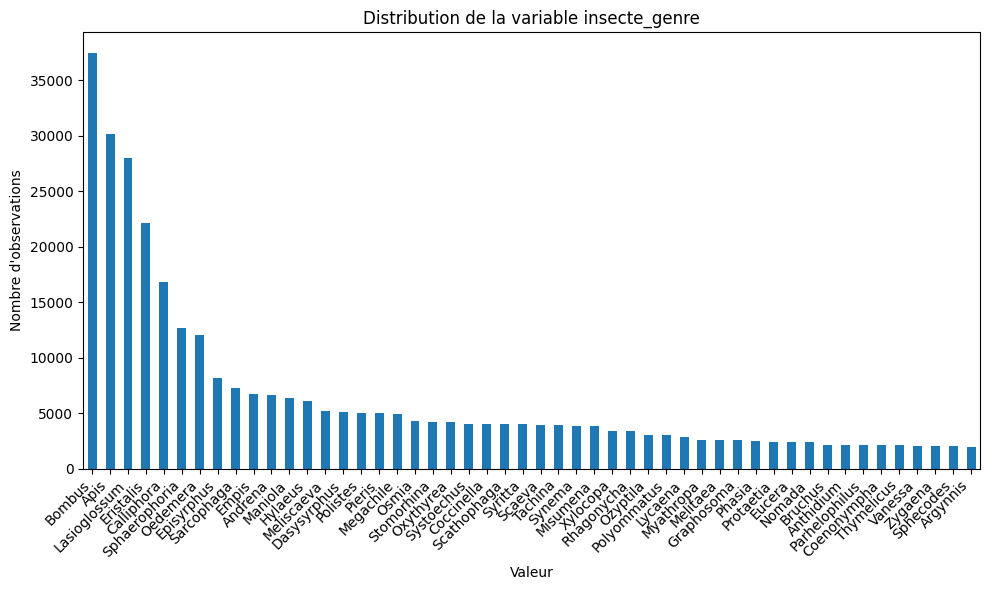

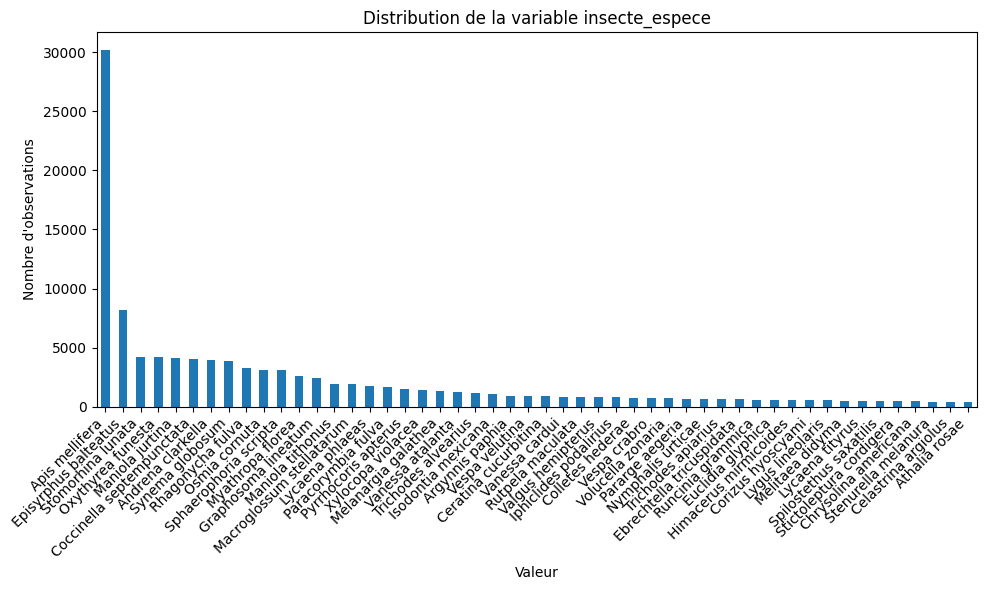

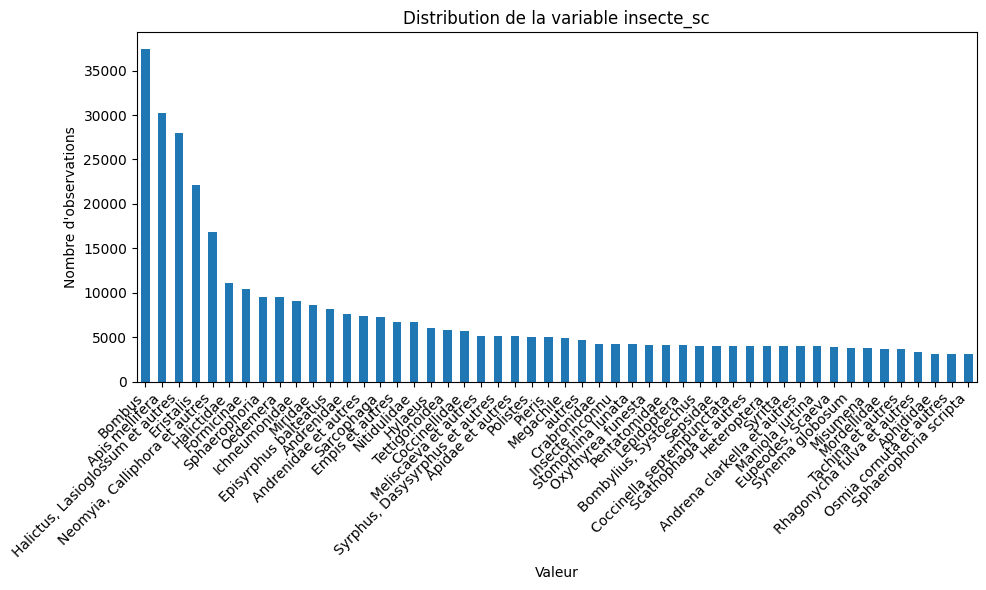

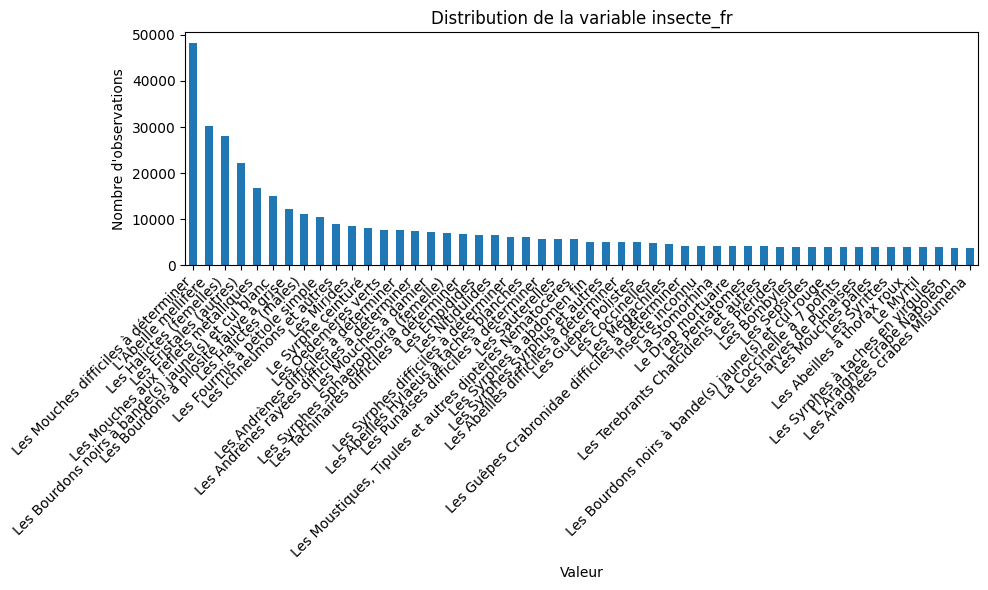

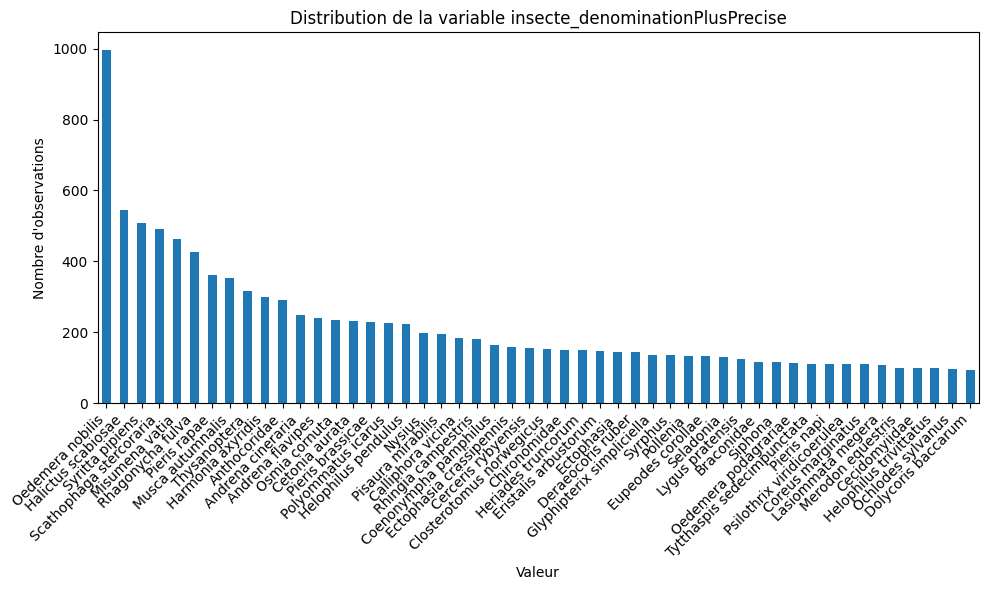

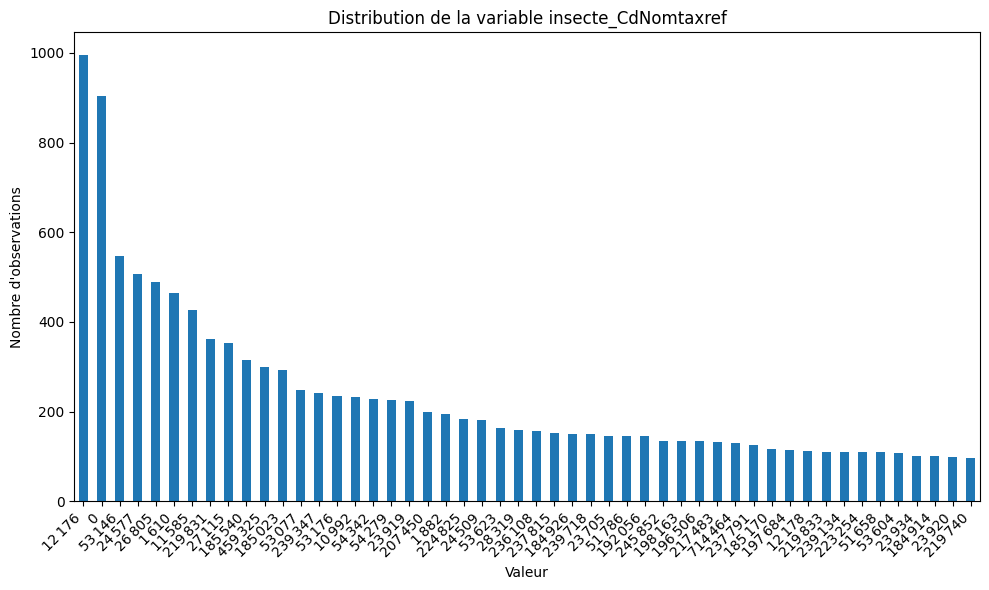

In [12]:
# Colonnes catégoriques 
cat_cols = df.select_dtypes(include=['object']).columns

# Distribution des 50 valeurs les plus fréquentes pour chaque variable catégorique
for col in cat_cols:
    # Décompte des valeurs et sélectionnez les 50 premières
    top_50_values = df[col].value_counts().head(50)
    
    # Diagramme à barres pour la distribution
    plt.figure(figsize=(10, 6))
    top_50_values.plot(kind='bar')
    plt.title(f'Distribution de la variable {col}')
    plt.xlabel('Valeur')
    plt.ylabel("Nombre d'observations")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


### Camemberts

#### Plantes - insectes

In [13]:
df['plante_fr'].nunique()

2193

In [87]:
df['insecte_sc'].nunique()

519

In [41]:
df['plante_fr'].value_counts()

Le Lierre grimpant        19636
Carotte sauvage           14324
Achillée millefeuille      9702
Berce des prés             8820
Le Buddléia de David       7542
                          ...  
Plantain Corne-de-cerf        1
Lin bisannuel                 1
Luzerne hérissée              1
Salsifis hybride              1
Hélianthème hérissé           1
Name: plante_fr, Length: 2193, dtype: int64

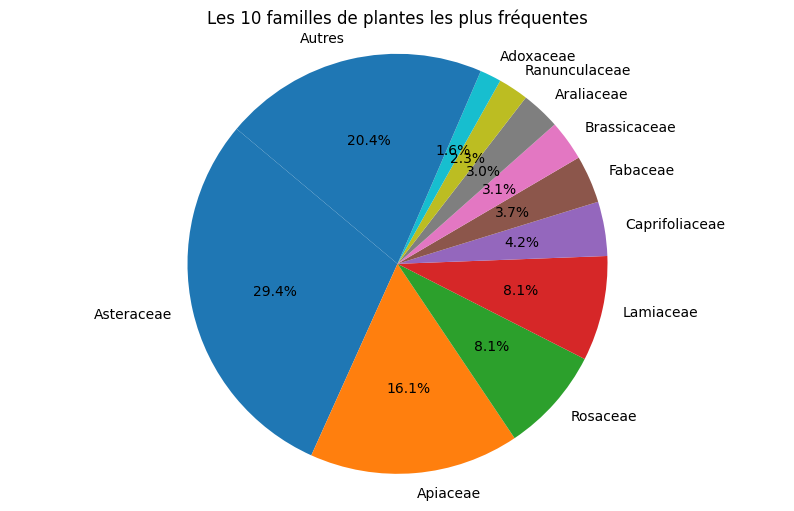

In [89]:
# Comptage des occurrences 
counts = df['plante_famille'].value_counts()

# Top 10 des valeurs les plus fréquents
top = counts.head(10)

# Fréquence totale du top 10 des valeurs les plus fréquents
total_top = top.sum()

# Fréquence des "autres" 
other_frequency = len(df) - total_top

# DataFrame pour le camembert avec les top 10 insectes et les "autres"
pie_data = pd.concat([top, pd.Series({'Autres': other_frequency})])

# Calcul des pourcentages
percentages = (pie_data / len(df)) * 100

# Tracé du diagramme camembert
plt.figure(figsize=(10, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Les 10 familles de plantes les plus fréquentes')
plt.axis('equal')
plt.show()


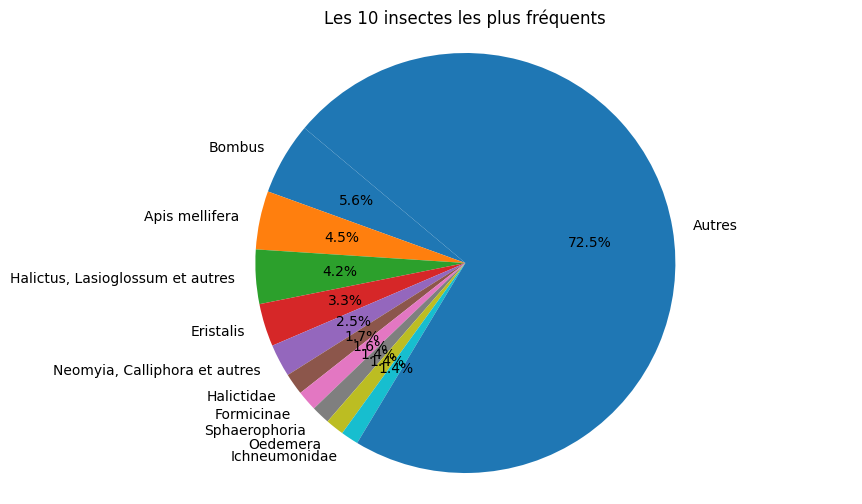

In [88]:
# Comptage des occurrences 
counts = df['insecte_sc'].value_counts()

# Top 10 des valeurs les plus fréquents
top = counts.head(10)

# Fréquence totale du top 10 des valeurs les plus fréquents
total_top = top.sum()

# Fréquence des "autres" 
other_frequency = len(df) - total_top

# DataFrame pour le camembert avec les top 10 insectes et les "autres"
pie_data = pd.concat([top, pd.Series({'Autres': other_frequency})])

# Calcul des pourcentages
percentages = (pie_data / len(df)) * 100

# Tracé du diagramme camembert
plt.figure(figsize=(10, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Les 10 insectes les plus fréquents')
plt.axis('equal')
plt.show()


#### Conditions météo

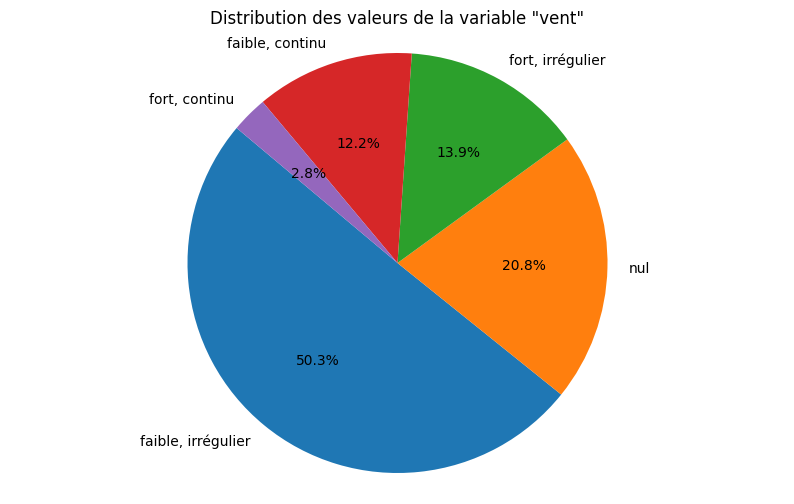

In [68]:
# Occurrences de chaque valeur de la variable "vent"
counts = df['vent'].value_counts()

# Calcul des pourcentages
percentages = (counts / len(df)) * 100

# Tracé du diagramme camembert
plt.figure(figsize=(10, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution des valeurs de la variable "vent"')
plt.axis('equal')
plt.show()


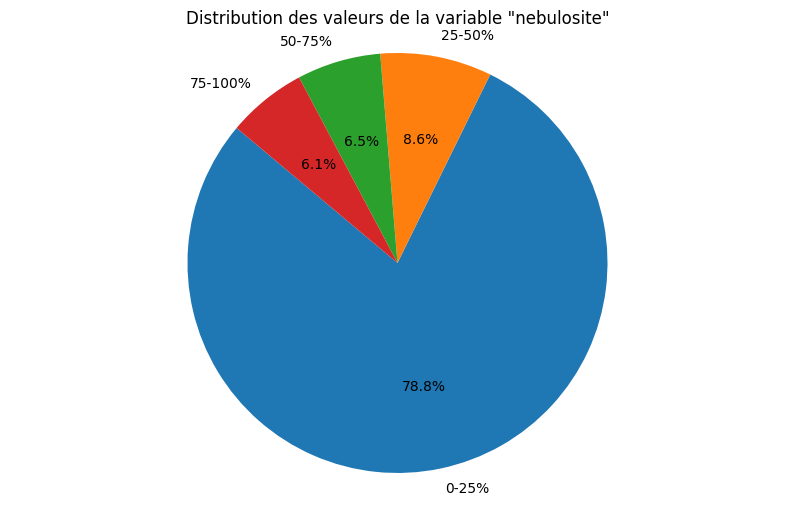

In [69]:
# Occurrences de chaque valeur de la variable "nebulosite"
counts = df['nebulosite'].value_counts()

# Calcul des pourcentages
percentages = (counts / len(df)) * 100

# Tracé du diagramme camembert
plt.figure(figsize=(10, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution des valeurs de la variable "nebulosite"')
plt.axis('equal')
plt.show()


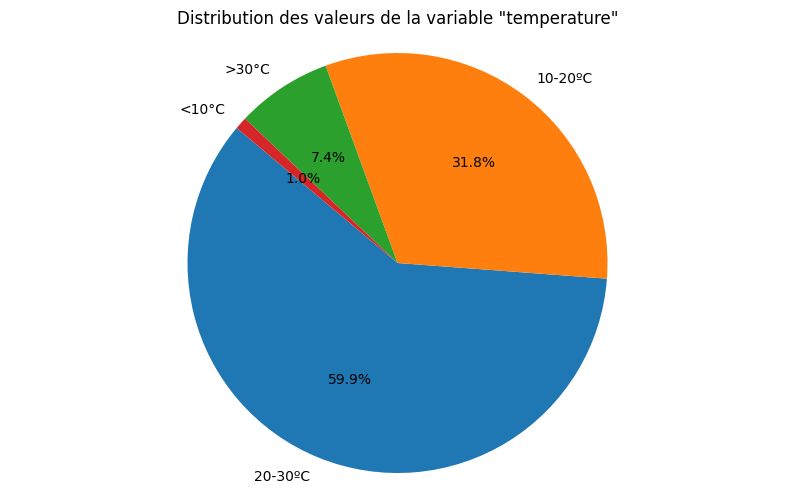

In [71]:
# Occurrences de chaque valeur de la variable "nebulosite"
counts = df['temperature'].value_counts()

# Calcul des pourcentages
percentages = (counts / len(df)) * 100

# Tracé du diagramme camembert
plt.figure(figsize=(10, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution des valeurs de la variable "temperature"')
plt.axis('equal')
plt.show()


## Gestion de la variable 'habitat'

In [74]:
df['habitat'].value_counts()

rural                                                         54852
jardin privé,rural                                            41707
prairie,rural                                                 39317
rural,jardin privé                                            29700
rural,prairie                                                 24693
                                                              ...  
urbain,jardin privé,rochers,péri-urbain,bord de route             1
péri-urbain,bord de l'eau,forêt,prairie                           1
bord de l'eau,péri-urbain,forêt,jardin privé                      1
jardin privé,péri-urbain,bord de l'eau,bord de route,forêt        1
rural,bord de route,parc ou jardin public,rochers                 1
Name: habitat, Length: 1293, dtype: int64

Pour chacune des lignes de la colonne habitat, on crée autant de colonnes que d'habitats précisés.
On obtient alors 6 colonnes habitats au total, avec pour chacune d'entre elle un seul habitat lorsque plusieurs étaient précisés dans la colonne initiale.

In [75]:
# One hot encoding après création de nouvelles colonnes pour chacun des habitats spécifiés entre ','
habitat_dummies = df['habitat'].str.get_dummies(',')

# Concaténation les colonnes de dummies avec le DataFrame d'origine
df = pd.concat([df, habitat_dummies], axis=1)

In [76]:
df.columns

Index(['collection_id', 'plante_famille', 'plante_genre', 'plante_espece',
       'plante_sc', 'plante_fr', 'plante_precision', 'habitat',
       'grande_culture', 'collection_date', 'collection_heure_debut',
       'nebulosite', 'temperature', 'vent', 'insecte_ordre',
       'insecte_super_famille', 'insecte_famille', 'insecte_sous_famille',
       'insecte_genre', 'insecte_espece', 'insecte_sc', 'insecte_fr',
       'insecte_denominationPlusPrecise', 'insecte_CdNomtaxref',
       'heure_collection', 'bord de l'eau', 'bord de route', 'forêt',
       'grande(s) culture(s)', 'jardin privé', 'littoral',
       'parc ou jardin public', 'prairie', 'péri-urbain', 'rochers', 'rural',
       'urbain'],
      dtype='object')

In [79]:
habitat_dummies.columns

Index(['bord de l'eau', 'bord de route', 'forêt', 'grande(s) culture(s)',
       'jardin privé', 'littoral', 'parc ou jardin public', 'prairie',
       'péri-urbain', 'rochers', 'rural', 'urbain'],
      dtype='object')

In [83]:
# Créez un dictionnaire pour stocker les résultats
habitats_dic = {}

# Pour chaque colonne, comptez le nombre de 1
for col in habitat_dummies.columns:
    habitats_dic[col] = df[col].sum()

habitats_dic

{"bord de l'eau": 64061,
 'bord de route': 133697,
 'forêt': 53862,
 'grande(s) culture(s)': 31957,
 'jardin privé': 168410,
 'littoral': 20668,
 'parc ou jardin public': 83569,
 'prairie': 163040,
 'péri-urbain': 158532,
 'rochers': 12635,
 'rural': 337694,
 'urbain': 102675}

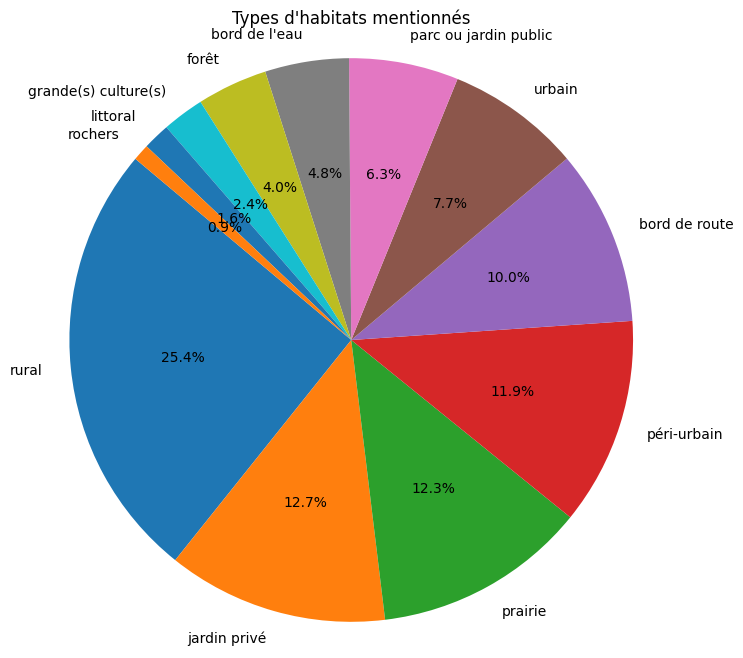

In [90]:
# Tri du dictionnaire par valeur 
sorted_habitats_dic = dict(sorted(habitats_dic.items(), key=lambda x: x[1], reverse=True))


# Créer une liste de labels et une liste de valeurs à partir du dictionnaire
labels = list(sorted_habitats_dic.keys())
values = list(sorted_habitats_dic.values())

# Tracez le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Types d'habitats mentionnés")
plt.axis('equal')  # Pour s'assurer que le cercle est tracé comme un cercle
plt.show()